In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'yfinance'

In [1]:
1+1

2

In [2]:
apple = yf.download("AAPL", start="2020-01-01")
sp500 = yf.download("^GSPC", start="2020-01-01")

apple.head()

NameError: name 'yf' is not defined

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
apple = yf.download("AAPL", start="2020-01-01")
sp500 = yf.download("^GSPC", start="2020-01-01")

apple.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400497,72.460761,71.156659,71.409763,135480400
2020-01-03,71.696648,72.455966,71.472469,71.629153,146322800
2020-01-06,72.267929,72.306499,70.568503,70.819201,118387200
2020-01-07,71.928055,72.533095,71.708695,72.277578,108872000
2020-01-08,73.085114,73.386431,71.631559,71.631559,132079200


In [5]:
# Download historical stock data
apple = yf.download("AAPL", start="2020-01-01")
sp500 = yf.download("^GSPC", start="2020-01-01")

# Preview first 5 rows of Apple data
apple.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400520,72.460784,71.156682,71.409785,135480400
2020-01-03,71.696640,72.455958,71.472462,71.629145,146322800
2020-01-06,72.267914,72.306483,70.568488,70.819186,118387200
2020-01-07,71.928062,72.533103,71.708703,72.277586,108872000
2020-01-08,73.085106,73.386423,71.631552,71.631552,132079200


In [6]:
# Calculate daily returns for Apple and S&P 500
apple['Daily Return'] = apple['Adj Close'].pct_change()
sp500['Daily Return'] = sp500['Adj Close'].pct_change()

# Show first 5 rows of daily returns
apple[['Adj Close', 'Daily Return']].head()

KeyError: 'Adj Close'

In [7]:
apple.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [8]:
# Calculate daily returns for Apple and S&P 500
apple['Daily Return'] = apple[('Close','AAPL')].pct_change()
sp500['Daily Return'] = sp500[('Close','^GSPC')].pct_change()

# Show first 5 rows of daily returns
apple[[('Close','AAPL'),'Daily Return']].head()

KeyError: "['Daily Return'] not in index"

In [9]:
# Calculate daily returns for Apple and S&P 500
apple['Daily Return'] = apple[('Close','AAPL')].pct_change()
sp500['Daily Return'] = sp500[('Close','^GSPC')].pct_change()

# Show first 5 rows: MultiIndex column and single-level column separately
apple[[('Close','AAPL')]].head()  # Closing price
apple[['Daily Return']].head()    # Daily return

Price,Daily Return
Ticker,
Date,
2020-01-02,NaN
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086


In [10]:
# Calculate cumulative returns
apple['Cumulative Return'] = (1 + apple['Daily Return']).cumprod()
sp500['Cumulative Return'] = (1 + sp500['Daily Return']).cumprod()

# Show first 5 rows of cumulative return
pd.concat([apple['Cumulative Return'], sp500['Cumulative Return']], axis=1).head()

,Cumulative Return,Cumulative Return
Date,,
2020-01-02,NaN,NaN
2020-01-03,0.990278,0.992940
2020-01-06,0.998168,0.996449
2020-01-07,0.993474,0.993655
2020-01-08,1.009456,0.998527


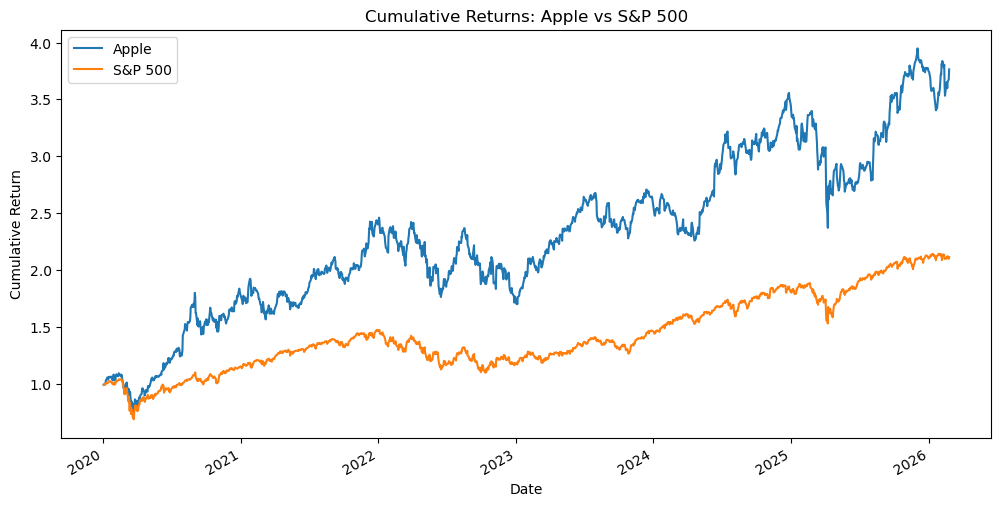

In [11]:
plt.figure(figsize=(12,6))
apple['Cumulative Return'].plot(label='Apple')
sp500['Cumulative Return'].plot(label='S&P 500')
plt.title('Cumulative Returns: Apple vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [12]:
# Calculate volatility (standard deviation of daily returns)
apple_vol = apple['Daily Return'].std()
sp500_vol = sp500['Daily Return'].std()

print(f"Apple daily volatility: {apple_vol:.4f}")
print(f"S&P 500 daily volatility: {sp500_vol:.4f}")

Apple daily volatility: 0.0200
S&P 500 daily volatility: 0.0131


In [13]:
# Calculate average daily returns
apple_avg = apple['Daily Return'].mean()
sp500_avg = sp500['Daily Return'].mean()

print(f"Apple average daily return: {apple_avg:.4f}")
print(f"S&P 500 average daily return: {sp500_avg:.4f}")

Apple average daily return: 0.0011
S&P 500 average daily return: 0.0006


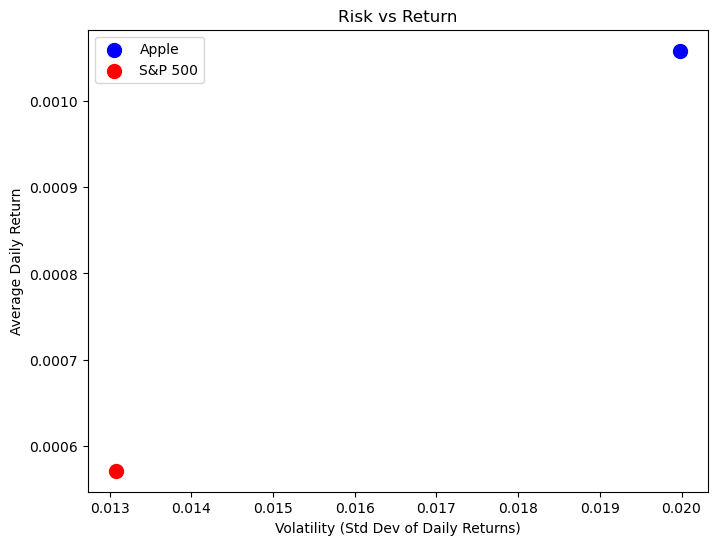

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(apple_vol, apple_avg, label='Apple', color='blue', s=100)
plt.scatter(sp500_vol, sp500_avg, label='S&P 500', color='red', s=100)
plt.title('Risk vs Return')
plt.xlabel('Volatility (Std Dev of Daily Returns)')
plt.ylabel('Average Daily Return')
plt.legend()
plt.show()

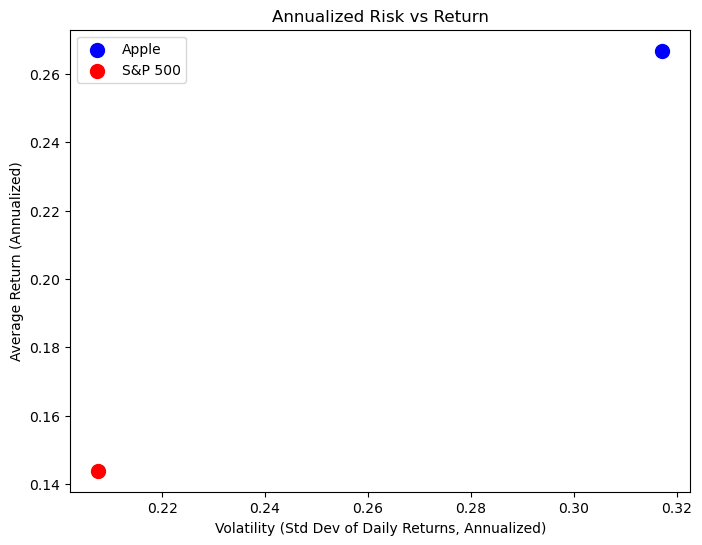

In [15]:
# Annualize average return and volatility
trading_days = 252  # typical number of trading days in a year

apple_avg_annual = apple_avg * trading_days
sp500_avg_annual = sp500_avg * trading_days

apple_vol_annual = apple_vol * (trading_days**0.5)
sp500_vol_annual = sp500_vol * (trading_days**0.5)

# Risk vs Return chart
plt.figure(figsize=(8,6))
plt.scatter(apple_vol_annual, apple_avg_annual, label='Apple', color='blue', s=100)
plt.scatter(sp500_vol_annual, sp500_avg_annual, label='S&P 500', color='red', s=100)
plt.title('Annualized Risk vs Return')
plt.xlabel('Volatility (Std Dev of Daily Returns, Annualized)')
plt.ylabel('Average Return (Annualized)')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/cumulative_returns.png'

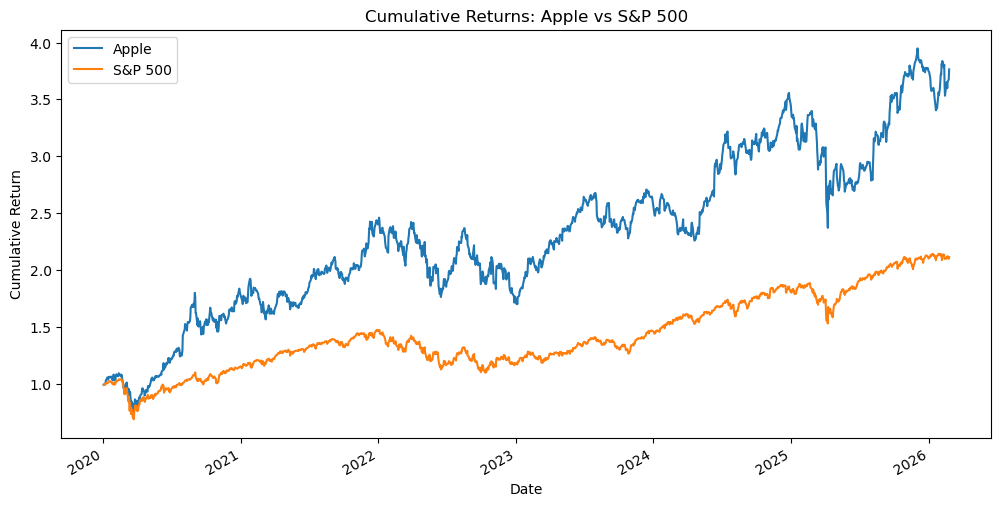

In [16]:
# Save cumulative returns chart
plt.figure(figsize=(12,6))
apple['Cumulative Return'].plot(label='Apple')
sp500['Cumulative Return'].plot(label='S&P 500')
plt.title('Cumulative Returns: Apple vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.savefig('outputs/cumulative_returns.png', bbox_inches='tight')
plt.close()

# Save risk vs return chart (annualized)
trading_days = 252
apple_avg_annual = apple['Daily Return'].mean() * trading_days
sp500_avg_annual = sp500['Daily Return'].mean() * trading_days
apple_vol_annual = apple['Daily Return'].std() * (trading_days**0.5)
sp500_vol_annual = sp500['Daily Return'].std() * (trading_days**0.5)

plt.figure(figsize=(8,6))
plt.scatter(apple_vol_annual, apple_avg_annual, label='Apple', color='blue', s=100)
plt.scatter(sp500_vol_annual, sp500_avg_annual, label='S&P 500', color='red', s=100)
plt.title('Annualized Risk vs Return')
plt.xlabel('Volatility (Std Dev of Daily Returns, Annualized)')
plt.ylabel('Average Return (Annualized)')
plt.legend()
plt.savefig('outputs/risk_return.png', bbox_inches='tight')
plt.close()

In [21]:
# Save cumulative returns chart
plt.figure(figsize=(12,6))
apple['Cumulative Return'].plot(label='Apple')
sp500['Cumulative Return'].plot(label='S&P 500')
plt.title('Cumulative Returns: Apple vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.savefig('outputs/cumulative_returns.png', bbox_inches='tight')
plt.close()

# Save risk vs return chart (annualized)
trading_days = 252
apple_avg_annual = apple['Daily Return'].mean() * trading_days
sp500_avg_annual = sp500['Daily Return'].mean() * trading_days
apple_vol_annual = apple['Daily Return'].std() * (trading_days**0.5)
sp500_vol_annual = sp500['Daily Return'].std() * (trading_days**0.5)

plt.figure(figsize=(8,6))
plt.scatter(apple_vol_annual, apple_avg_annual, label='Apple', color='blue', s=100)
plt.scatter(sp500_vol_annual, sp500_avg_annual, label='S&P 500', color='red', s=100)
plt.title('Annualized Risk vs Return')
plt.xlabel('Volatility (Std Dev of Daily Returns, Annualized)')
plt.ylabel('Average Return (Annualized)')
plt.legend()
plt.savefig('outputs/risk_return.png', bbox_inches='tight')
plt.close()

In [19]:
import os

# Create outputs folder if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

In [22]:
import os
print(os.listdir())  # should show 'outputs' among other folders

['.ipynb_checkpoints', 'outputs', 'portfolio_analysis.ipynb', 'README.md', 'Test.txt', 'Untitled.ipynb']


In [23]:
plt.savefig

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

In [24]:
Documents\GitHub-Projects\python-portfolio-analysis\outputs

SyntaxError: unexpected character after line continuation character (2331525623.py, line 1)